# Cluster Robust Double Machine Learning

This example demonstrates the cluster robust features of the [DoubleML](https://docs.doubleml.org/stable/index.html) package.
The theoretical foundations are given in Chiang et al. 2021.

In [1]:
library('hdm')
library('DoubleML')
library('mlr3')
library('mlr3learners')
# surpress messages from mlr3 package during fitting
lgr::get_logger("mlr3")$set_threshold("warn")

library('ggplot2')
library('reshape2')
library('gridExtra')

## Two-Way Cluster Robust DML

In a first part, we show how the two-way cluster roboust DML (Chiang et al. 2021) can be implemented with the [DoubleML](https://docs.doubleml.org/stable/index.html) package.
Chiang et al. (2021) consider double-indexed data

\begin{equation}
\lbrace W_{ij}: i \in \lbrace 1, \ldots, N \rbrace, j \in \lbrace 1, \ldots, M \rbrace \rbrace
\end{equation}

and the partially linear IV regression model (PLIV)

$$\begin{aligned}
Y_{ij} = D_{ij} \theta_0 +  g_0(X_{ij}) + \epsilon_{ij}, & &\mathbb{E}(\epsilon_{ij} | X_{ij}, Z_{ij}) = 0, \\
Z_{ij} = m_0(X_{ij}) + v_{ij}, & &\mathbb{E}(v_{ij} | X_{ij}) = 0.
\end{aligned}$$

### Simulate multiway cluster data

We use the PLIV data generating process described in Section 4.1 of Chiang et al. (2020).
The DGP is defined as
$$\begin{aligned}
Z_{ij} &= X_{ij}' \xi_0 + V_{ij}, \\
D_{ij} &= Z_{ij}' \pi_{10} + X_{ij}' \pi_{20} + v_{ij}, \\
Y_{ij} &= D_{ij} \theta + X_{ij}' \zeta_0 + \varepsilon_{ij},
\end{aligned}$$
with
$$\begin{aligned}
X_{ij} &= (1 - \omega_1^X - \omega_2^X) \alpha_{ij}^X
+ \omega_1^X \alpha_{i}^X + \omega_2^X \alpha_{j}^X, \\
\varepsilon_{ij} &= (1 - \omega_1^\varepsilon - \omega_2^\varepsilon) \alpha_{ij}^\varepsilon
+ \omega_1^\varepsilon \alpha_{i}^\varepsilon + \omega_2^\varepsilon \alpha_{j}^\varepsilon, \\
v_{ij} &= (1 - \omega_1^v - \omega_2^v) \alpha_{ij}^v
+ \omega_1^v \alpha_{i}^v + \omega_2^v \alpha_{j}^v, \\
V_{ij} &= (1 - \omega_1^V - \omega_2^V) \alpha_{ij}^V
+ \omega_1^V \alpha_{i}^V + \omega_2^V \alpha_{j}^V,
\end{aligned}$$
and $\alpha_{ij}^X, \alpha_{i}^X, \alpha_{j}^X \sim \mathcal{N}(0, \Sigma)$
where  $\Sigma$ is a $p_x \times p_x$ matrix with entries
$\Sigma_{kj} = s_X^{|j-k|}$.
Further
$$\begin{aligned}
\left(\begin{matrix} \alpha_{ij}^\varepsilon \\ \alpha_{ij}^v \end{matrix}\right),
\left(\begin{matrix} \alpha_{i}^\varepsilon \\ \alpha_{i}^v \end{matrix}\right),
\left(\begin{matrix} \alpha_{j}^\varepsilon \\ \alpha_{j}^v \end{matrix}\right)
\sim \mathcal{N}\left(0, \left(\begin{matrix} 1 & s_{\varepsilon v} \\
s_{\varepsilon v} & 1 \end{matrix} \right) \right)
\end{aligned}$$
and $\alpha_{ij}^V, \alpha_{i}^V, \alpha_{j}^V \sim \mathcal{N}(0, 1)$.

Data from this DGP can be generated with the [make_pliv_multiway_cluster_CKMS2021()](### Simulate multiway cluster data

We use the PLIV data generating process described in Section 4.1 of Chiang et al. (2020).
The DGP is defined as
$$\begin{aligned}
Z_{ij} &= X_{ij}' \xi_0 + V_{ij}, \\
D_{ij} &= Z_{ij}' \pi_{10} + X_{ij}' \pi_{20} + v_{ij}, \\
Y_{ij} &= D_{ij} \theta + X_{ij}' \zeta_0 + \varepsilon_{ij},
\end{aligned}$$
with
$$\begin{aligned}
X_{ij} &= (1 - \omega_1^X - \omega_2^X) \alpha_{ij}^X
+ \omega_1^X \alpha_{i}^X + \omega_2^X \alpha_{j}^X, \\
\varepsilon_{ij} &= (1 - \omega_1^\varepsilon - \omega_2^\varepsilon) \alpha_{ij}^\varepsilon
+ \omega_1^\varepsilon \alpha_{i}^\varepsilon + \omega_2^\varepsilon \alpha_{j}^\varepsilon, \\
v_{ij} &= (1 - \omega_1^v - \omega_2^v) \alpha_{ij}^v
+ \omega_1^v \alpha_{i}^v + \omega_2^v \alpha_{j}^v, \\
V_{ij} &= (1 - \omega_1^V - \omega_2^V) \alpha_{ij}^V
+ \omega_1^V \alpha_{i}^V + \omega_2^V \alpha_{j}^V,
\end{aligned}$$
and $\alpha_{ij}^X, \alpha_{i}^X, \alpha_{j}^X \sim \mathcal{N}(0, \Sigma)$
where  $\Sigma$ is a $p_x \times p_x$ matrix with entries
$\Sigma_{kj} = s_X^{|j-k|}$.
Further
$$\begin{aligned}
\left(\begin{matrix} \alpha_{ij}^\varepsilon \\ \alpha_{ij}^v \end{matrix}\right),
\left(\begin{matrix} \alpha_{i}^\varepsilon \\ \alpha_{i}^v \end{matrix}\right),
\left(\begin{matrix} \alpha_{j}^\varepsilon \\ \alpha_{j}^v \end{matrix}\right)
\sim \mathcal{N}\left(0, \left(\begin{matrix} 1 & s_{\varepsilon v} \\
s_{\varepsilon v} & 1 \end{matrix} \right) \right)
\end{aligned}$$
and $\alpha_{ij}^V, \alpha_{i}^V, \alpha_{j}^V \sim \mathcal{N}(0, 1)$.

Data from this DGP can be generated with the [make_pliv_multiway_cluster_CKMS2021()](https://docs.doubleml.org/r/stable/reference/make_pliv_multiway_cluster_CKMS2021.html) function from [DoubleML](https://docs.doubleml.org/stable/index.html).) function from [DoubleML](https://docs.doubleml.org/stable/index.html).

In [2]:
# Set the simulation parameters
N = 25  # number of observations (first dimension)
M = 25  # number of observations (second dimension)
dim_X = 100  # dimension of X
set.seed(3141) # set seed

obj_dml_data = make_pliv_multiway_cluster_CKMS2021(N, M, dim_X)

### Data-Backend for Cluster Data
The implemenation of cluster robust double machine learning is based on a special data-backend called [DoubleMLClusterData](https://docs.doubleml.org/r/stable/reference/DoubleMLClusterData.html).

In [3]:
# The simulated data is of type DoubleMLClusterData
print(obj_dml_data)

================= DoubleMLClusterData Object ==================


------------------ Data summary      ------------------
Outcome variable: Y
Treatment variable(s): D
Cluster variable(s): cluster_var_i, cluster_var_j
Covariates: X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X72, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95, X96, X97, X98, X99, X100
Instrument(s): Z
No. Observations: 625


In [4]:
# The cluster variables are part of the DataFrame
head(obj_dml_data$data)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X96,X97,X98,X99,X100,Y,D,cluster_var_i,cluster_var_j,Z
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
-0.3707775,0.994168239,-0.1045303,-0.1145370,0.41341040,1.01925597,0.7776071,-0.2467506,0.07456127,-0.1795850,⋯,0.5763996,0.49530782,-0.25401679,0.06895837,-0.34967621,1.150408,0.97489106,1,1,0.3522697
-0.1577657,0.490070931,-0.0702127,0.8932105,-0.02163217,-0.08968939,0.5025850,-0.5436005,-0.51966955,-1.0118095,⋯,-0.6243811,-0.07168291,-0.57715074,0.20823898,0.01403089,-1.364595,-0.50035174,1,2,-0.1626685
0.4416552,0.366718627,-0.1557093,-0.3702770,-0.32458367,0.07347676,-0.2619317,-0.2836059,0.94906344,-0.3304269,⋯,-0.2080787,0.76591188,0.01351638,0.30672815,-0.22336235,1.010450,0.42113494,1,3,1.2020435
0.1144500,-0.009645422,-0.2103034,-0.7560824,-0.02247976,-0.13505272,-0.3800694,-0.3727679,-0.42412729,-0.8055563,⋯,-0.9304028,-0.20783816,-0.39425708,-0.91315015,-0.67245350,1.342675,0.67453494,1,4,0.8132463
-0.5050973,-1.523977545,-0.4584447,0.0853505,0.92369755,-0.21624417,-0.9961392,-0.2191274,-0.67410934,-0.3788859,⋯,-0.0695854,0.22505965,-0.42073312,0.22375856,0.50672034,-1.140861,-0.56999947,1,5,-0.1213405
-0.1468115,-0.175635027,-1.0466028,-0.4199952,-0.19033538,0.88173062,0.5868472,0.2670691,0.57496671,-0.9802393,⋯,0.3738573,0.20219609,-1.52424539,-0.12707800,0.01398951,0.363276,0.08357714,1,6,0.7241399


### Initialize the objects of class  DoubleMLPLIV

In [5]:
# Set machine learning methods for m, g & r
ml_g = lrn("regr.cv_glmnet", nfolds = 10, s = "lambda.min")
ml_m = lrn("regr.cv_glmnet", nfolds = 10, s = "lambda.min")
ml_r = lrn("regr.cv_glmnet", nfolds = 10, s = "lambda.min")

# initialize the DoubleMLPLIV object
dml_pliv_obj = DoubleMLPLIV$new(obj_dml_data,
                                ml_g, ml_m, ml_r,
                                n_folds=3)

In [6]:
print(dml_pliv_obj)

================= DoubleMLPLIV Object ==================


------------------ Data summary      ------------------
Outcome variable: Y
Treatment variable(s): D
Covariates: X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X72, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95, X96, X97, X98, X99, X100
Instrument(s): Z
No. Observations: 625

------------------ Score & algorithm ------------------
Score function: partialling out
DML algorithm: dml2

------------------ Machine learner   ------------------
ml_g: regr.cv_glmnet
ml_m: regr.cv_glmnet
ml_r: regr.cv_glmnet

------------------ Resampling        ------------------
No. folds pe

fit() not yet called.



### Cluster Robust Cross Fitting
A key element of cluster robust DML (Chiang et al. 2021) is a special sample splitting used for the cross-fitting.
In case of two-way clustering, we assume $N$ clusters in the first dimension and $M$ clusters in the second dimension.

For $K$-fold cross-fitting, Chiang et al. 2021 proposed to randomly partition $[N]:=\{1,\ldots,N\}$ into $K$ subsets $\{I_1, \ldots, I_K\}$ and $[M]:=\{1,\ldots,N\}$ into $K$ subsets $\{J_1, \ldots, J_K\}$.
Effectively, one then considers $K^2$ folds.
Basically for each $(k, \ell) \in \{1, \ldots, K\} \times \{1, \ldots, K\}$, the nuisance functions are estimated for all double-indexed observations in $([N]\setminus I_K) \times ([M]\setminus J_\ell)$, i.e.,
$$
\hat{\eta}_{k\ell} = \hat{\eta}\left((W_{ij})_{(i,j)\in ([N]\setminus I_K) \times ([M]\setminus J_\ell)}\right)
$$
The causal parameter is then estimated as usual by solving a moment condition with a Neyman orthogonal score function.
For two-way cluster robust double machine learning with algorithm DML2 this results in solving
$$
\frac{1}{K^2} \sum_{k=1}^{K} \sum_{\ell=1}^{K} \frac{1}{|I_k| |J_\ell|} \sum_{(i,j) \in I_K \times J_\ell}
\psi(W_{ij}, \tilde{\theta}_0, \hat{\eta}_{k\ell}) = 0
$$
for $\tilde{\theta}_0$.
Here $|I_k|$ denotes the cardinality, i.e., the number of clusters in the $k$-th fold for the first cluster variable.

We can visualize the sample splitting of the $N \cdot M = 625$ observations into $K \cdot K = 9$ folds.

In [7]:
library(RColorBrewer)
coul <- rev(colorRampPalette(brewer.pal(8, "RdBu"))(3))
options(repr.plot.width = 10, repr.plot.height = 10)

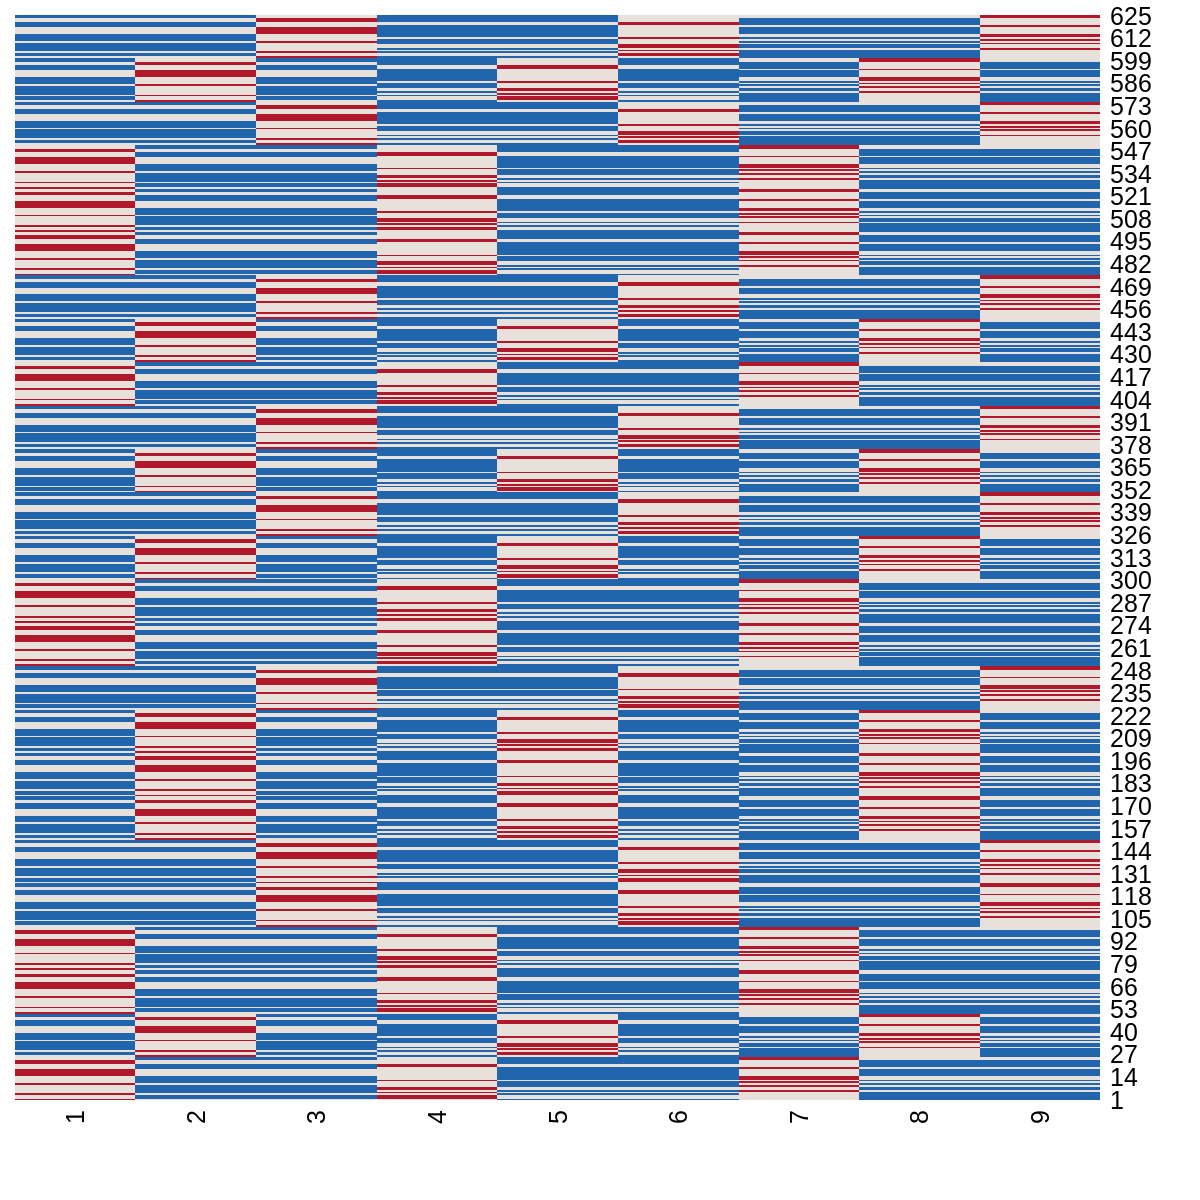

In [8]:
smpls = dml_pliv_obj$smpls[[1]]
n_folds = dml_pliv_obj$n_folds
df = matrix(0, nrow = N*M, ncol = n_folds)
for (i_fold in 1:n_folds){
    df[smpls$train_ids[[i_fold]], i_fold] = -1
    df[smpls$test_ids[[i_fold]], i_fold] = 1
}

heatmap(df, Rowv=NA, Colv=NA, col=coul, cexRow=1.5, cexCol=1.5, scale='none')

If we visualize the sample splitting in terms of the cluster variables the sample splitting into $9$ folds $I_k \times J_\ell$ becomes clearer.

In [9]:
smpls_cluster = dml_pliv_obj$smpls_cluster[[1]]
n_folds = dml_pliv_obj$n_folds
n_folds_per_cluster = sqrt(dml_pliv_obj$n_folds)
#options(repr.plot.width = 6, repr.plot.height = 6)
plots = list()
for (i_fold in 1:n_folds){
    mat = matrix(0, nrow = M, ncol = N)
    for (k in smpls_cluster$train_ids[[i_fold]][[1]]) {
        for (l in smpls_cluster$train_ids[[i_fold]][[2]]) {
            mat[k, l] = -1
        }
    }
    for (k in smpls_cluster$test_ids[[i_fold]][[1]]) {
        for (l in smpls_cluster$test_ids[[i_fold]][[2]]) {
            mat[k, l] = 1
        }
    }
    l = (i_fold-1) %% n_folds_per_cluster + 1
    k = ((i_fold-1) %/% n_folds_per_cluster)+1
    df = data.frame(mat)
    cols = names(df)
    names(df) = 1:N
    df$id = 1:N
    df_plot = melt(df,  id.var = 'id')
    df_plot$value = factor(df_plot$value)
    plots[[i_fold]] = ggplot(data = df_plot, aes(x=id, y=variable)) + 
      geom_tile(aes(fill=value), colour = "grey50") +
    scale_fill_manual(values = c("darkblue", "white", "darkred")) +
    theme(text = element_text(size=15))
    # ToDo: Add Subplot titles
    if (k == 3) {
        plots[[i_fold]] = plots[[i_fold]] + xlab(expression(paste('Second Cluster Variable ', l)))
    } else {
        plots[[i_fold]] = plots[[i_fold]] + xlab('')
    }
    if (l == 1) {
        plots[[i_fold]] = plots[[i_fold]] + ylab(expression(paste('First Cluster Variable ', k)))
    } else {
        plots[[i_fold]] = plots[[i_fold]] + ylab('')
    }
}

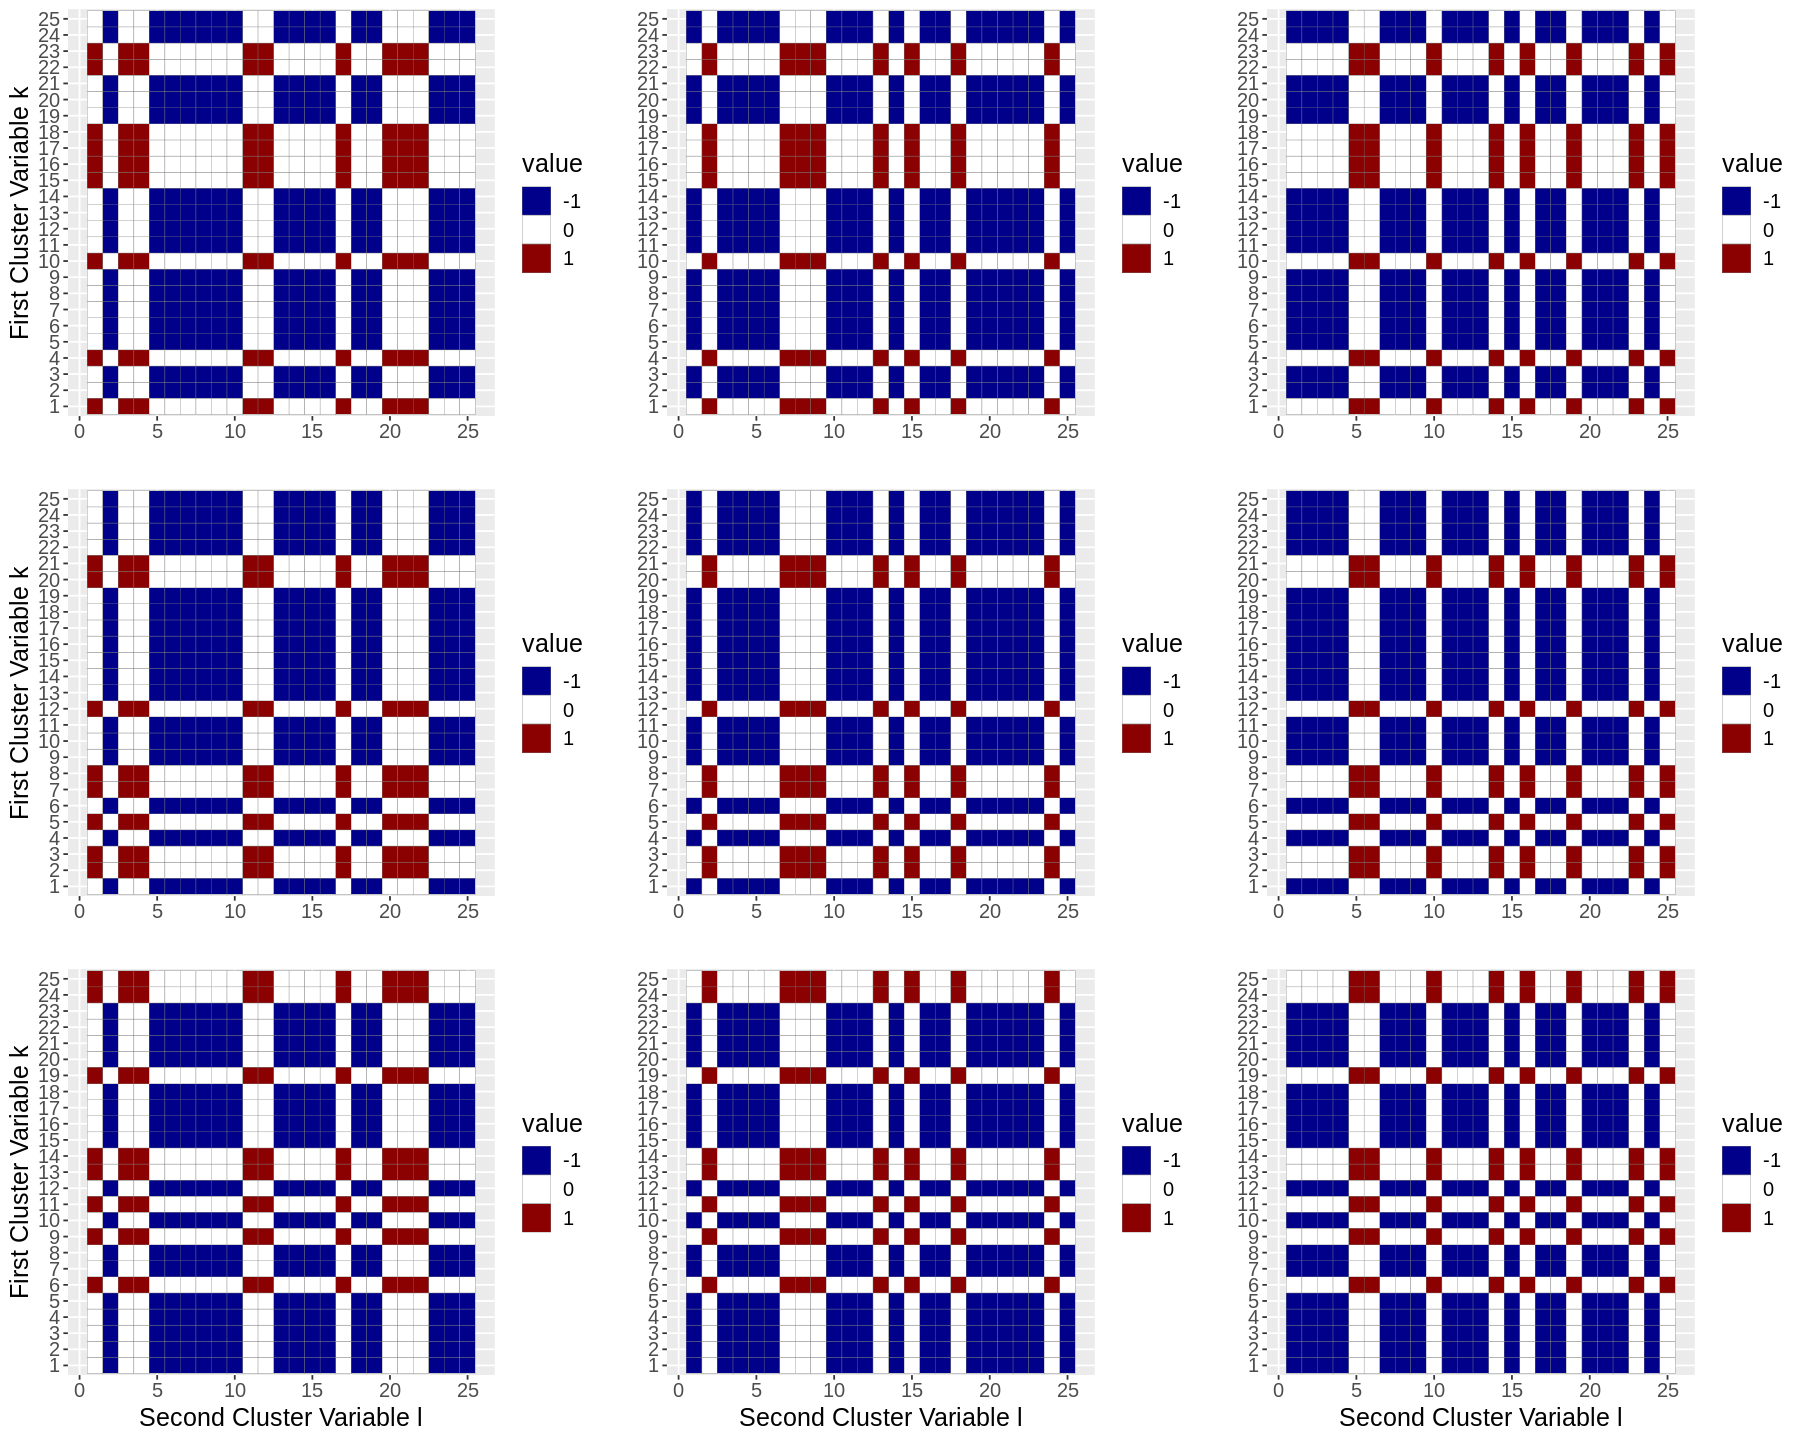

In [10]:
options(repr.plot.width = 15, repr.plot.height = 12)
grid.arrange(grobs=plots, ncol = 3, nrow = 3)

### Cluster Robust Standard Errors
In the abstract base class `DoubleML` the estimation of cluster robust standard errors is implemented for all supported double machine learning models.
It is based on the assumption of a linear Neyman orthogonal score function.
We use the notation $n \wedge m := \min\{n,m\}$.
For the the asymptotic variance of
$\sqrt{\underline{C}}(\tilde{\theta_0} - \theta_0$ with
$\underline{C} := N \wedge M$
Chiang et al. 2021 then proposed the following estimator
$$
\hat{\sigma}^2 = \hat{J}^{-1} \hat{\Gamma} \hat{J}^{-1}
$$
where
$$
\begin{aligned}
\hat{\Gamma} = \frac{1}{K^2} \sum_{(k, \ell) \in[K]^2}
\left[ \frac{|I_k| \wedge |J_\ell|}{(|I_k||J_\ell|)^2}
\left(\sum_{i \in I_k} \sum_{j \in J_\ell} \sum_{j' \in J_\ell}
\psi(W_{ij}; \tilde{\theta}, \hat{\eta}_{k \ell}) \psi(W_{ij'}; \tilde{\theta}_0, \hat{\eta}_{k \ell})
+ \sum_{i \in I_k} \sum_{i' \in I_k} \sum_{j \in J_\ell}
\psi(W_{ij}; \tilde{\theta}, \hat{\eta}_{k \ell}) \psi(W_{i'j}; \tilde{\theta}_0, \hat{\eta}_{k \ell})
\right)
\right]
\end{aligned}$$
and
$$
\begin{aligned}
\hat{J} = \frac{1}{K^2} \sum_{(k, \ell) \in[K]^2} \frac{1}{|I_k||J_\ell|}
\sum_{i \in I_k} \sum_{j \in J_\ell}
\psi_a(W_{ij}; \tilde{\theta}_0, \hat{\eta}_{k \ell}).
\end{aligned}
$$
A $(1-\alpha)$ confidence interval is then given by (Chiang et al. 2020)
$$\begin{aligned}
\left[
\tilde{\theta} \pm \Phi^{-1}(1-\alpha/2) \sqrt{\hat{\sigma}^2 / \underline{C}}
\right]
\end{aligned}
$$
with $\underline{C} = N \wedge M$.

In [11]:
# Estimate the PLIV model with cluster robust double machine learning
dml_pliv_obj$fit()
dml_pliv_obj$summary()

Estimates and significance testing of the effect of target variables
  Estimate. Std. Error t value Pr(>|t|)    
D    0.8909     0.1258   7.084  1.4e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




## (One-Way) Cluster Robust Double Machine Learing

We again use the PLIV data generating process described in Section 4.1 of Chiang et al. (2020).
To obtain one-way clustered data, we set the following weights to zero
$$
\omega_2^X = \omega_2^\varepsilon = \omega_2^v = \omega_2^V = 0.
$$
Again we can simulate this data with [make_pliv_multiway_cluster_CKMS2021()](https://docs.doubleml.org/r/stable/reference/make_pliv_multiway_cluster_CKMS2021.html). To prepare the data-backend for one-way clustering, we only have to alter the `cluster_cols` to be `'cluster_var_i'`.

In [12]:
obj_dml_data = make_pliv_multiway_cluster_CKMS2021(N, M, dim_X,
                                                   omega_X = c(0.25, 0),
                                                   omega_epsilon = c(0.25, 0),
                                                   omega_v = c(0.25, 0),
                                                   omega_V = c(0.25, 0))

In [13]:
obj_dml_data$cluster_cols = 'cluster_var_i'
print(obj_dml_data)

================= DoubleMLClusterData Object ==================


------------------ Data summary      ------------------
Outcome variable: Y
Treatment variable(s): D
Cluster variable(s): cluster_var_i
Covariates: X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X72, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95, X96, X97, X98, X99, X100
Instrument(s): Z
No. Observations: 625


In [14]:
# Set machine learning methods for m, g & r
ml_g = lrn("regr.cv_glmnet", nfolds = 10, s = "lambda.min")
ml_m = lrn("regr.cv_glmnet", nfolds = 10, s = "lambda.min")
ml_r = lrn("regr.cv_glmnet", nfolds = 10, s = "lambda.min")

# initialize the DoubleMLPLIV object
dml_pliv_obj = DoubleMLPLIV$new(obj_dml_data,
                                ml_g, ml_m, ml_r,
                                n_folds=3)

In [15]:
dml_pliv_obj$fit()
dml_pliv_obj$summary()

Estimates and significance testing of the effect of target variables
  Estimate. Std. Error t value Pr(>|t|)    
D   0.92905    0.04465   20.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




## Data Application
As data application we revist the consumer demand example from Chiang et al. (2021).
The U.S. automobile data of Berry, Levinsohn, and Pakes (1995) is obtained from the `R` package `hdm`.

### Load and Process Data

In [16]:
## Prepare the BLP data
data(BLP);
blp_data <- BLP$BLP;
blp_data$price <- blp_data$price + 11.761
blp_data$log_p = log(blp_data$price)

In [17]:
x_cols = c('hpwt', 'air', 'mpd', 'space')
head(blp_data[x_cols])

,hpwt,air,mpd,space
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5289969,0,1.888146,1.1502
2,0.4943244,0,1.935989,1.2780
3,0.4676134,0,1.716799,1.4592
4,0.4265403,0,1.687871,1.6068
5,0.4524887,0,1.504286,1.6458
6,0.4508706,0,1.726813,1.6224


In [18]:
iv_vars = as.data.frame(hdm:::constructIV(blp_data$firm.id,
                            blp_data$cdid,
                            blp_data$id,
                            blp_data[x_cols]))

In [19]:
formula = formula(paste0(" ~ -1 + (hpwt + air + mpd + space)^2",
                         "+ I(hpwt^2)*(air + mpd + space)",
                         "+ I(air^2)*(hpwt + mpd + space)",
                         "+ I(mpd^2)*(hpwt + air + space)",
                         "+ I(space^2)*(hpwt + air + mpd)",
                         "+ I(space^2) + I(hpwt^3) + I(air^3) + I(mpd^3) + I(space^3)"))
data_transf = data.frame(model.matrix(formula, blp_data))
names(data_transf)

[1] "hpwt"            "air"             "mpd"             "space"          
 [5] "I.hpwt.2."       "I.air.2."        "I.mpd.2."        "I.space.2."     
 [9] "I.hpwt.3."       "I.air.3."        "I.mpd.3."        "I.space.3."     
[13] "hpwt.air"        "hpwt.mpd"        "hpwt.space"      "air.mpd"        
[17] "air.space"       "mpd.space"       "air.I.hpwt.2."   "mpd.I.hpwt.2."  
[21] "space.I.hpwt.2." "hpwt.I.air.2."   "mpd.I.air.2."    "space.I.air.2." 
[25] "hpwt.I.mpd.2."   "air.I.mpd.2."    "space.I.mpd.2."  "hpwt.I.space.2."
[29] "air.I.space.2."  "mpd.I.space.2."

In [20]:
y_col = 'y'
d_col = 'log_p'
cluster_cols = c('model.id', 'cdid')
all_z_cols = c('sum.other.hpwt', 'sum.other.mpd', 'sum.other.space')
z_col = all_z_cols[1]

In [21]:
dml_df = cbind(blp_data[c(y_col, d_col, cluster_cols)],
               data_transf,
               iv_vars[all_z_cols])

### Initialize `DoubleMLClusterData` object

In [22]:
dml_data = DoubleMLClusterData$new(dml_df,
                                   y_col=y_col,
                                   d_cols=d_col,
                                   z_cols=z_col,
                                   cluster_cols=cluster_cols,
                                   x_cols=names(data_transf))

In [23]:
print(dml_data)

================= DoubleMLClusterData Object ==================


------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): log_p
Cluster variable(s): model.id, cdid
Covariates: hpwt, air, mpd, space, I.hpwt.2., I.air.2., I.mpd.2., I.space.2., I.hpwt.3., I.air.3., I.mpd.3., I.space.3., hpwt.air, hpwt.mpd, hpwt.space, air.mpd, air.space, mpd.space, air.I.hpwt.2., mpd.I.hpwt.2., space.I.hpwt.2., hpwt.I.air.2., mpd.I.air.2., space.I.air.2., hpwt.I.mpd.2., air.I.mpd.2., space.I.mpd.2., hpwt.I.space.2., air.I.space.2., mpd.I.space.2.
Instrument(s): sum.other.hpwt
No. Observations: 2217


In [24]:
lasso = lrn("regr.cv_glmnet", nfolds = 10, s = "lambda.min")

In [25]:
coef_df = data.frame(matrix(NA_real_, ncol = 4, nrow = 1))
colnames(coef_df) = c('zero-way', 'one-way-product', 'one-way-market', 'two-way')
rownames(coef_df) = all_z_cols[1]
se_df = coef_df
n_rep = 10

### Two-Way Clustering with Respect to Product and Market

In [26]:
set.seed(1111)
dml_data$z_cols = z_col
dml_data$cluster_cols = c('model.id', 'cdid')
dml_pliv = DoubleMLPLIV$new(dml_data,
                            lasso, lasso, lasso,
                            n_folds=2, n_rep=n_rep)
dml_pliv$fit()
coef_df[1, 4] = dml_pliv$coef
se_df[1, 4] = dml_pliv$se

### One-Way Clustering with Respect to the Product

In [27]:
set.seed(2222)
dml_data$z_cols = z_col
dml_data$cluster_cols = 'model.id'
dml_pliv = DoubleMLPLIV$new(dml_data,
                            lasso, lasso, lasso,
                            n_folds=4, n_rep=n_rep)
dml_pliv$fit()
coef_df[1, 2] = dml_pliv$coef
se_df[1, 2] = dml_pliv$se

### One-Way Clustering with Respect to the Market

In [28]:
set.seed(3333)
dml_data$z_cols = z_col
dml_data$cluster_cols = 'cdid'
dml_pliv = DoubleMLPLIV$new(dml_data,
                            lasso, lasso, lasso,
                            n_folds=4, n_rep=n_rep)
dml_pliv$fit()
coef_df[1, 3] = dml_pliv$coef
se_df[1, 3] = dml_pliv$se

### No Clustering / Zero-Way Clustering

In [29]:
dml_data = DoubleMLData$new(dml_df,
                            y_col=y_col,
                            d_cols=d_col,
                            z_cols=z_col,
                            x_cols=names(data_transf))

In [30]:
print(dml_data)

================= DoubleMLData Object ==================


------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): log_p
Covariates: hpwt, air, mpd, space, I.hpwt.2., I.air.2., I.mpd.2., I.space.2., I.hpwt.3., I.air.3., I.mpd.3., I.space.3., hpwt.air, hpwt.mpd, hpwt.space, air.mpd, air.space, mpd.space, air.I.hpwt.2., mpd.I.hpwt.2., space.I.hpwt.2., hpwt.I.air.2., mpd.I.air.2., space.I.air.2., hpwt.I.mpd.2., air.I.mpd.2., space.I.mpd.2., hpwt.I.space.2., air.I.space.2., mpd.I.space.2.
Instrument(s): sum.other.hpwt
No. Observations: 2217


In [31]:
set.seed(4444)
dml_data$z_cols = z_col
dml_pliv = DoubleMLPLIV$new(dml_data,
                            lasso, lasso, lasso,
                            n_folds=4, n_rep=n_rep)
dml_pliv$fit()
coef_df[1, 1] = dml_pliv$coef
se_df[1, 1] = dml_pliv$se

### Application Results

In [32]:
coef_df

,zero-way,one-way-product,one-way-market,two-way
,<dbl>,<dbl>,<dbl>,<dbl>
sum.other.hpwt,-5.953521,-5.74881,-5.574029,-5.259151


In [33]:
se_df

,zero-way,one-way-product,one-way-market,two-way
,<dbl>,<dbl>,<dbl>,<dbl>
sum.other.hpwt,0.5094695,0.9658985,0.7080277,1.523868


## References
Berry, S., Levinsohn, J., and Pakes, A. (1995), “Automobile Prices in Market
Equilibrium,” Econometrica: Journal of the Econometric Society, 63, 841-890.
Chiang, H. D., Kato K., Ma, Y. and Sasaki, Y. (2021), Multiway Cluster Robust Double/Debiased Machine Learning, Journal of Business & Economic Statistics, doi: [10.1080/07350015.2021.1895815](https://doi.org/10.1080/07350015.2021.1895815), arXiv: [1909.03489](https://arxiv.org/abs/1909.03489).